In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from safetensors.torch import load_file
from tqdm import tqdm
import pandas as pd


In [12]:
features = pd.read_csv("sslfeatures_score.csv")
df = features

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,1019,1020,1021,1022,1023,model_name,accuracy,fluency,prosodic,total
0,-0.312636,-0.469341,-0.233398,-0.726744,-0.123130,0.582023,1.533833,-0.107735,0.378165,-0.367880,...,-0.588186,0.131412,0.676301,1.072100,0.469145,gen_w2v2-large,9.0,9.0,9.0,9.0
1,-0.168175,-0.440494,-0.195373,-0.682758,-0.032676,0.306763,1.808508,-0.093684,0.365061,-0.282002,...,-0.784139,0.174786,0.776967,1.035899,0.571026,gen_w2v2-large,7.0,9.0,9.0,7.0
2,-0.200558,-0.453742,-0.220377,-0.691926,-0.048072,0.370473,1.713636,-0.095591,0.374002,-0.310224,...,-0.775388,0.149544,0.763459,1.054175,0.539191,gen_w2v2-large,9.0,9.0,9.0,9.0
3,-0.249609,-0.464179,-0.233789,-0.702581,-0.076562,0.483607,1.624274,-0.102575,0.386654,-0.338182,...,-0.706556,0.139913,0.740864,1.068261,0.502885,gen_w2v2-large,8.0,9.0,8.0,7.0
4,-0.172396,-0.448402,-0.217604,-0.689995,-0.028400,0.329589,1.766693,-0.091417,0.378363,-0.297471,...,-0.764261,0.155847,0.803698,1.060903,0.534560,gen_w2v2-large,9.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,0.005956,0.011442,-0.037425,-0.091800,-0.022152,0.024215,-0.033921,-0.050104,-0.043904,-0.006250,...,0.103243,0.016767,-0.090980,-0.022442,-0.036518,ptctc_wlm,5.0,3.0,3.0,4.0
104996,-0.021480,0.047278,-0.071888,0.022776,0.001719,-0.008967,-0.035891,-0.001905,-0.073057,-0.030910,...,0.081871,-0.008224,-0.054527,-0.007168,-0.046957,ptctc_wlm,6.0,6.0,5.0,5.0
104997,-0.019851,0.004047,-0.050236,-0.001338,-0.010708,0.026346,0.022531,-0.055590,-0.035730,-0.016391,...,0.104731,-0.019901,-0.075207,-0.027392,-0.081663,ptctc_wlm,4.0,3.0,3.0,3.0
104998,0.021291,-0.019406,-0.041489,-0.033971,-0.005212,-0.014104,-0.004423,0.017132,-0.068966,-0.055877,...,0.138642,0.021645,-0.058887,0.023620,-0.023694,ptctc_wlm,5.0,5.0,4.0,4.0


In [263]:
mdname = df['model_name'].tolist()
name = set(mdname)
print(name)

{'pt_hb', 'gen_hb-xlarge-ls960-ft', 'gen_wlm-large', 'gen_hb-large-ll60k', 'ctc_wlm-large', 'fz_wlm-base-plus-sv', 'fz_hb-base-ls960', 'fz_w2v2-xlsr-53', 'gen_w2v2-large', 'ctc_w2v2-large-960h', 'ctc_wlm-base-plus', 'gen_wlm-base-plus-sv', 'fz_w2v2-large-lv60', 'fz_hb-xlarge-ll60k', 'ptctc_wlm', 'ctc_w2v2-xls-r-300m', 'ctc_hb-base-ls960', 'fz_hb-xlarge-ls960-ft', 'ctc_w2v2-large-lv60', 'gen_w2v2-xls-r-300m', 'fz_wlm-large', 'ctc_hb-xlarge-ls960-ft', 'gen_hb-base-ls960', 'ptctc_hb', 'pt_w2v2', 'ctc_hb-xlarge-ll60k', 'ctc_hb-large-ll60k', 'fz_hb-large-ll60k', 'fz_w2v2-large', 'fz_w2v2-xls-r-300m', 'ptctc_w2v2', 'gen_hb-xlarge-ll60k', 'gen_w2v2-xlsr-53', 'pt_wlm', 'ctc_w2v2-large', 'gen_wlm-base-plus', 'gen_w2v2-large-lv60', 'fz_w2v2-large-960h', 'fz_wlm-base-plus', 'ctc_wlm-base-plus-sv', 'gen_w2v2-large-960h', 'ctc_w2v2-xlsr-53'}


In [368]:
df2 = df[df['model_name'] == 'gen_wlm-large']
df2 = df2.reset_index(drop=True)
df2

,0,1,2,3,4,5,6,7,8,9,...,1019,1020,1021,1022,1023,model_name,accuracy,fluency,prosodic,total
0,0.047748,0.068662,-0.064294,0.174725,0.203255,-0.256530,-0.337839,0.186305,-0.617891,-0.358959,...,0.270308,-0.311261,0.235004,0.167097,0.337768,gen_wlm-large,9.0,9.0,9.0,9.0
1,0.073716,0.071957,-0.075457,0.184846,0.189336,-0.262409,-0.330915,0.204741,-0.612548,-0.358052,...,0.283633,-0.328375,0.255393,0.167201,0.355464,gen_wlm-large,7.0,9.0,9.0,7.0
2,0.081790,0.077799,-0.085627,0.184091,0.185726,-0.265604,-0.325720,0.214177,-0.604795,-0.354009,...,0.287836,-0.330250,0.264393,0.171357,0.358867,gen_wlm-large,9.0,9.0,9.0,9.0
3,0.082758,0.074907,-0.083520,0.186580,0.187089,-0.264341,-0.324565,0.218219,-0.602368,-0.355493,...,0.287649,-0.333369,0.266246,0.171601,0.359166,gen_wlm-large,8.0,9.0,8.0,7.0
4,0.088482,0.078601,-0.086645,0.184168,0.187632,-0.264526,-0.324799,0.222358,-0.600271,-0.351078,...,0.287101,-0.332102,0.267764,0.170855,0.360944,gen_wlm-large,9.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.260472,-0.066542,-0.007691,0.089134,0.200508,-0.395913,-0.423067,0.237809,-0.488213,-0.011143,...,0.015772,-0.195240,0.111165,0.159704,0.405299,gen_wlm-large,5.0,3.0,3.0,4.0
2496,-0.237303,-0.018322,-0.034352,0.005481,0.170031,-0.375384,-0.331772,0.229613,-0.473984,-0.066978,...,0.050762,-0.235930,0.079996,0.199349,0.306182,gen_wlm-large,6.0,6.0,5.0,5.0
2497,-0.232686,0.015760,-0.037273,-0.004086,0.183067,-0.302340,-0.270686,0.225534,-0.417821,-0.107592,...,0.069144,-0.204255,0.079306,0.188419,0.228815,gen_wlm-large,4.0,3.0,3.0,3.0
2498,-0.253317,-0.052907,-0.014158,0.076767,0.193068,-0.375306,-0.421027,0.246819,-0.488377,-0.008284,...,0.013795,-0.215147,0.097576,0.161342,0.387673,gen_wlm-large,5.0,5.0,4.0,4.0


## Split feature vectors and labels

In [ ]:
X = df2.drop(['model_name', 'accuracy', 'fluency', 'prosodic', 'total'], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.047748,0.068662,-0.064294,0.174725,0.203255,-0.256530,-0.337839,0.186305,-0.617891,-0.358959,...,0.095084,0.234697,-0.089862,0.114346,0.404484,0.270308,-0.311261,0.235004,0.167097,0.337768
1,0.073716,0.071957,-0.075457,0.184846,0.189336,-0.262409,-0.330915,0.204741,-0.612548,-0.358052,...,0.116445,0.278376,-0.109848,0.119071,0.399321,0.283633,-0.328375,0.255393,0.167201,0.355464
2,0.081790,0.077799,-0.085627,0.184091,0.185726,-0.265604,-0.325720,0.214177,-0.604795,-0.354009,...,0.133041,0.308772,-0.129899,0.124733,0.392435,0.287836,-0.330250,0.264393,0.171357,0.358867
3,0.082758,0.074907,-0.083520,0.186580,0.187089,-0.264341,-0.324565,0.218219,-0.602368,-0.355493,...,0.132997,0.308516,-0.127845,0.122396,0.392452,0.287649,-0.333369,0.266246,0.171601,0.359166
4,0.088482,0.078601,-0.086645,0.184168,0.187632,-0.264526,-0.324799,0.222358,-0.600271,-0.351078,...,0.136029,0.318990,-0.130915,0.124711,0.389525,0.287101,-0.332102,0.267764,0.170855,0.360944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.260472,-0.066542,-0.007691,0.089134,0.200508,-0.395913,-0.423067,0.237809,-0.488213,-0.011143,...,0.138345,-0.018656,0.254797,-0.019058,0.037914,0.015772,-0.195240,0.111165,0.159704,0.405299
2496,-0.237303,-0.018322,-0.034352,0.005481,0.170031,-0.375384,-0.331772,0.229613,-0.473984,-0.066978,...,0.034782,0.002441,0.211891,0.011787,-0.019424,0.050762,-0.235930,0.079996,0.199349,0.306182
2497,-0.232686,0.015760,-0.037273,-0.004086,0.183067,-0.302340,-0.270686,0.225534,-0.417821,-0.107592,...,-0.028216,0.050394,0.215748,0.032907,-0.022410,0.069144,-0.204255,0.079306,0.188419,0.228815
2498,-0.253317,-0.052907,-0.014158,0.076767,0.193068,-0.375306,-0.421027,0.246819,-0.488377,-0.008284,...,0.133830,-0.011988,0.251545,-0.007449,0.033713,0.013795,-0.215147,0.097576,0.161342,0.387673


In [ ]:
Y = df2[['fluency']]
Y

,fluency
0,9.0
1,9.0
2,9.0
3,9.0
4,9.0
...,...
2495,3.0
2496,6.0
2497,3.0
2498,5.0


## covariance matrix of features

In [ ]:
features = X.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 0.01196156  0.00420334 -0.002424   ...  0.00611441 -0.00165906
  -0.00187881]
 [ 0.00420334  0.00164049 -0.00101846 ...  0.00219196 -0.00053213
  -0.00068483]
 [-0.002424   -0.00101846  0.00088664 ... -0.00128819  0.00025627
   0.00017168]
 ...
 [ 0.00611441  0.00219196 -0.00128819 ...  0.00326161 -0.00068376
  -0.00085775]
 [-0.00165906 -0.00053213  0.00025627 ... -0.00068376  0.0007739
   0.00039386]
 [-0.00187881 -0.00068483  0.00017168 ... -0.00085775  0.00039386
   0.00081678]]


## eigen vectors and eigen values from covariance matrix

In [372]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [373]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.05564118 -0.00808173 -0.01585793 ... -0.00171146 -0.00773848
  -0.00418735]
 [-0.01972074 -0.00710073 -0.00161515 ...  0.02218109  0.00441759
   0.04071894]
 [ 0.0111645   0.02086215 -0.01121103 ... -0.02169564 -0.0251913
  -0.0196547 ]
 ...
 [-0.0288295  -0.00247162  0.01377726 ...  0.01098487  0.01089023
   0.05521233]
 [ 0.00719367  0.01426814  0.04067658 ...  0.03706765 -0.04013192
  -0.05242516]
 [ 0.0087836  -0.01627141  0.0417997  ... -0.00214287 -0.01630012
   0.00325699]]


In [374]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[3.82105967e+00 4.90650003e-01 1.49789101e-01 ... 4.62280215e-08
 4.31529905e-08 4.34022097e-08]


In [ ]:
eig_vals[0] / sum(eig_vals)

0.8300159874160229

## Project data point onto selected Eigen Vector

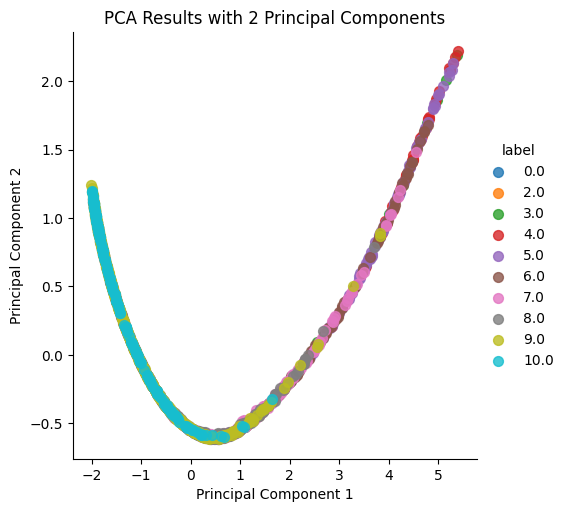

In [ ]:
from sklearn import decomposition
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pca = decomposition.PCA(n_components=2)
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = Y

sns.lmplot(x='PC1', y='PC2', data=pca_df, fit_reg=False, scatter_kws={"s": 50}, hue="label")
plt.title('PCA Results with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


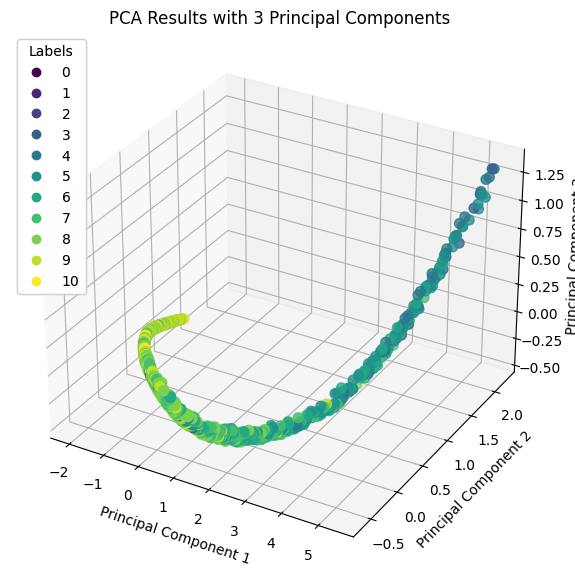

In [ ]:
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


pca = decomposition.PCA(n_components=3)
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['label'] = Y
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['label'], cmap='viridis', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)

ax.set_title('PCA Results with 3 Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
